In [43]:
#import all library and models for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
#to scale varible
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [44]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [7.0, 4.0]
plt.rcParams.update({'font.size': 12,})

About The Dataset


The brazilian_houses_to_rent dataset is a collection of data on houses available for rent in different cities in Brazil. The dataset contains information on the number of rooms, bathrooms, parking spaces, floor area, and the rental price of each house.This dataset has a total of 10962 houses to rent with 13 diferent features, it can be used for various purposes such as predicting the rental cost of houses. 

 For the course of this project would be working on clustering the data, to detect and remove outliers from `PROPERTY TAX` and the `HOA` column.
 
To make this dataset more accessible its gotten from kaggle: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent/data
Having import all libraries to be used for the course of this project, would read and call out the data DataFrame,clean up the data as its an uncleaned dataset.

In [45]:
## Start
df = pd.read_csv('houses_to_rent.csv')
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [46]:
def clean_data(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x.replace('R$', ''))
    df[col_name] = df[col_name].apply(lambda x: x.replace(',', ''))
    for i, val in enumerate(df[col_name].to_list()):
        try:
            df[col_name][i] = float(df[col_name][i])
        except:
            df[col_name][i] = np.nan

    df[col_name] = df[col_name].astype(float)
    
    return df[col_name]

In [47]:
import warnings
warnings.filterwarnings('ignore')
    
df['hoa'] = clean_data(df, 'hoa')
df['property tax'] = clean_data(df, 'property tax')

df = df[['hoa', 'property tax']]

df.isna().sum()

hoa             202
property tax     27
dtype: int64

Having Cleaned the main columns been worked on in the dataset i found out the there are missing values in them so would be droping the missing value as that is not the main aim of this project.

In [48]:
df = df.dropna()
df.shape

(5852, 2)

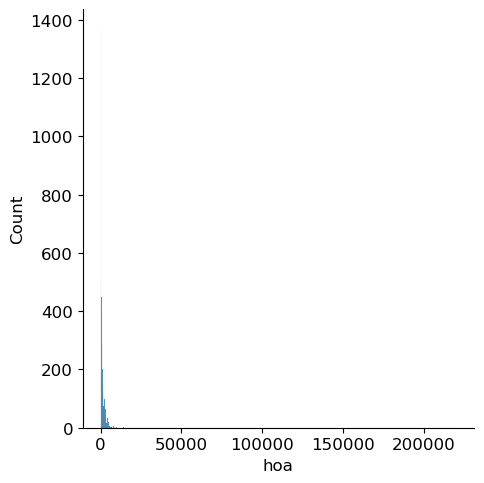

In [49]:
sns.displot(df.hoa)

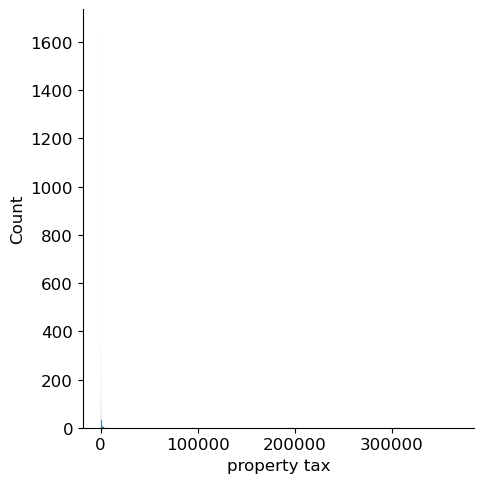

In [50]:
sns.displot(df['property tax'])

From the visualization of the both columns of interest, `hoa` have values that are mostly at the lower left side of the plot indicating that there are possible outliers ranged from about 50000 and above. Similarly, for the `property tax`, the values are mostly concentrated at the same position with possible outliers from 100000 and above. In summary, both varibles have issues with outliers.

The cells below uses the clustering technique to properly detect these outliers.

In [51]:
# Transform the data using Standardization technique
num_cols = ['hoa', 'property tax']
scale = StandardScaler()
standardised_cols = scale.fit_transform(df[num_cols])
standardised_cols

array([[-0.27815429,  0.07894558],
       [-0.14489695, -0.05973333],
       [ 0.75138205,  0.14481017],
       ...,
       [-0.21646107, -0.07236923],
       [-0.27815429, -0.03951591],
       [-0.15748236, -0.07900307]])

In [52]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(standardised_cols)
df['clustering_result'] = result

df.head()

,hoa,property tax,clustering_result
0,0.0,1000.0,0
1,540.0,122.0,0
2,4172.0,1417.0,0
3,700.0,150.0,0
4,0.0,41.0,0


In [53]:
df.clustering_result.value_counts()

clustering_result
0    5848
2       2
1       2
Name: count, dtype: int64

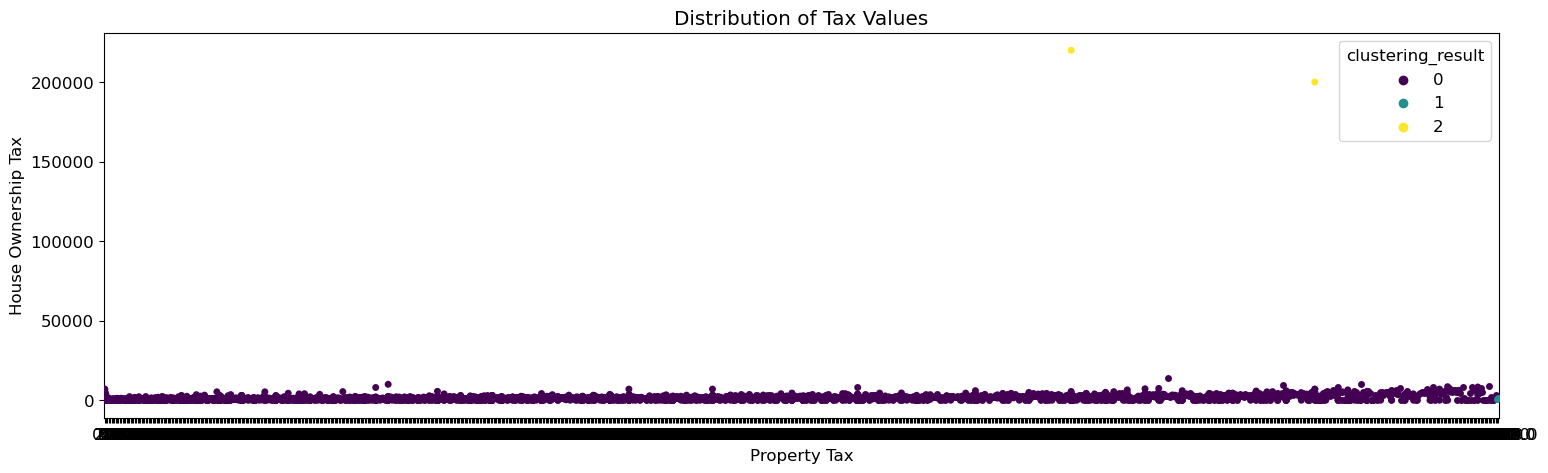

In [54]:
fig, ax = plt.subplots(figsize=(18, 5))

sns.stripplot(ax=ax, x=df['property tax'], y=df.hoa, hue=df['clustering_result'], palette='viridis')
ax.set_title(f'Distribution of Tax Values')
ax.set_xlabel('Property Tax')
ax.set_ylabel('House Ownership Tax')

plt.show()

From the plot above, it  show cluster one to be the outliers in the dataset. Rows classified under clusters 0 and 2 will be retained while rows under cluster 1 will be removed.

In [55]:
# Select the rows that fall under cluster 0 and 2 since their values are the most contained; removing the outliers in 1.
df_without_outliers = df[df['clustering_result']!=1]
df_without_outliers

,hoa,property tax,clustering_result
0,0.0,1000.0,0
1,540.0,122.0,0
2,4172.0,1417.0,0
3,700.0,150.0,0
4,0.0,41.0,0
...,...,...,...
6075,420.0,0.0,0
6076,768.0,63.0,0
6077,250.0,42.0,0
6078,0.0,250.0,0


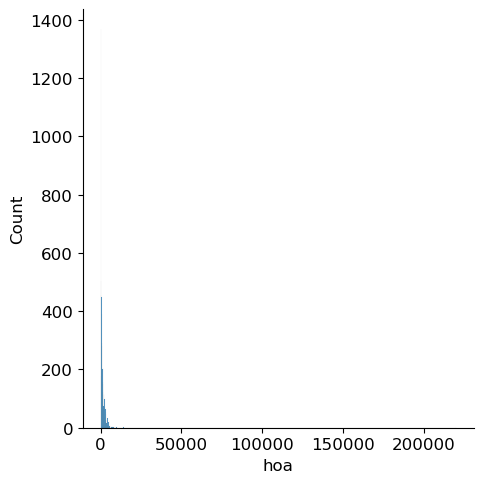

In [56]:
sns.displot(df[df['clustering_result']!=1]['hoa'])

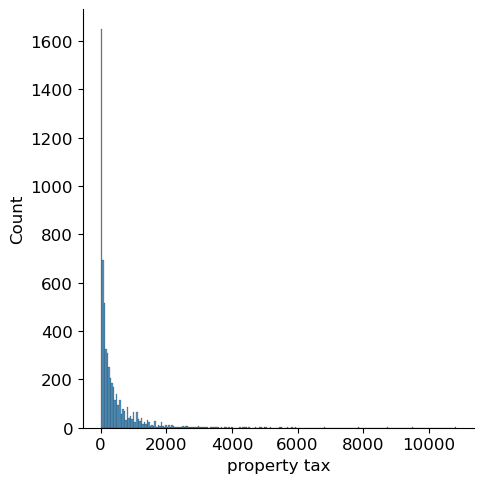

In [57]:
sns.displot(df[df['clustering_result']!=1]['property tax'])